Reading Medata file. Stored as maestro-v3.0.0.json. Part of this repo

In [10]:
import json
import pandas as pd
import os
import pretty_midi
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_meta = pd.read_json('maestro-v3.0.0.json')

df_meta.head()

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
0,Alban Berg,Sonata Op. 1,train,2018,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,698.661160
1,Alban Berg,Sonata Op. 1,train,2008,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,759.518471
2,Alban Berg,Sonata Op. 1,train,2017,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,464.649433
3,Alexander Scriabin,"24 Preludes Op. 11, No. 13-24",train,2004,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,872.640588
4,Alexander Scriabin,"3 Etudes, Op. 65",validation,2006,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,397.857508


Visualizing the first entry from the dataframe to check functionality

In [9]:
def midi_to_pianoroll(midi_path, fs=100):
    """
    Convert MIDI file to pianoroll representation.
    
    Parameters:
    midi_path (str): Path to the MIDI file.
    fs (int): Sampling frequency for the pianoroll in Hz.
    
    Returns:
    np.ndarray: Pianoroll representation of the MIDI file.
    """
    midi_data = pretty_midi.PrettyMIDI(midi_path)
    pianoroll = midi_data.get_piano_roll(fs=fs)
    return pianoroll

def audio_to_melspectrogram(audio_path, sr=22050, n_fft=2048, hop_length=512, n_mels=128):
    """
    Convert audio file to mel-spectrogram representation.
    
    Parameters:
    audio_path (str): Path to the audio file.
    sr (int): Sample rate of the audio file.
    n_fft (int): Length of the FFT window.
    hop_length (int): Number of samples between successive frames.
    n_mels (int): Number of Mel bands to generate.
    
    Returns:
    np.ndarray: Mel-spectrogram representation of the audio file.
    """
    y, sr = librosa.load(audio_path, sr=sr)
    melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    melspectrogram_db = librosa.power_to_db(melspectrogram, ref=np.max)
    return melspectrogram_db

# Example usage
midi_path = '../maestro-v3.0.0/' + df_meta.loc[0, 'midi_filename']
audio_path = '../maestro-v3.0.0/' + df_meta.loc[0, 'audio_filename'] 

pianoroll = midi_to_pianoroll(midi_path)
melspectrogram = audio_to_melspectrogram(audio_path)

# Do something with the pianoroll and melspectrogram


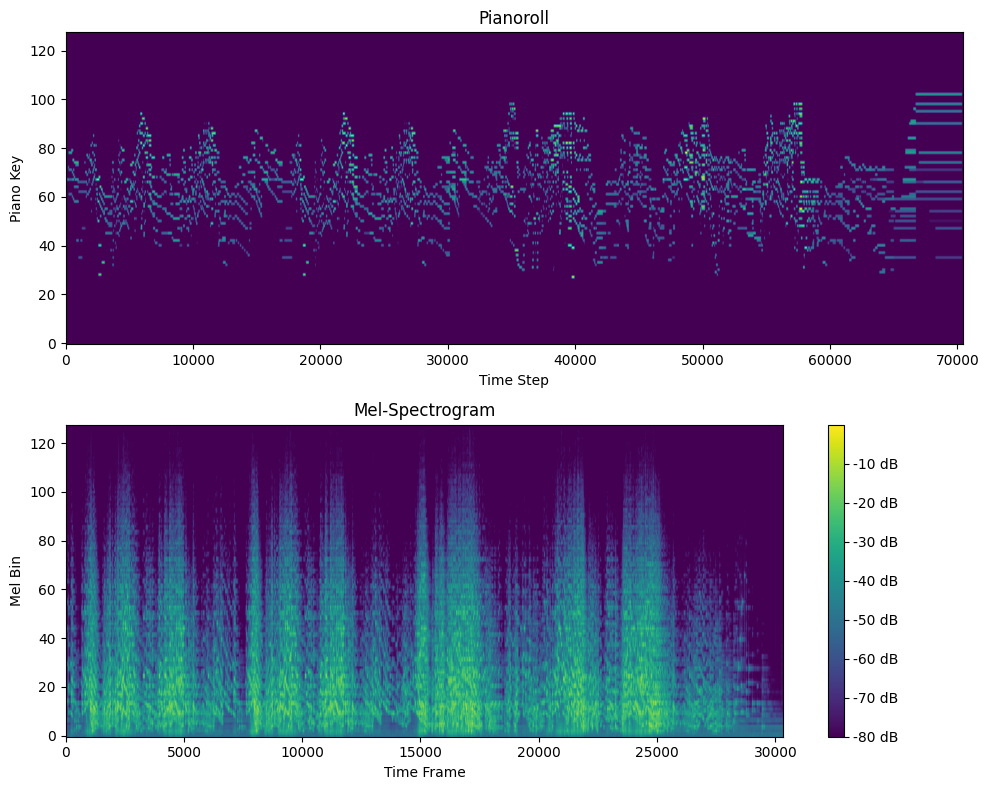

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Pianoroll
axs[0].imshow(pianoroll, aspect='auto', origin='lower')
axs[0].set_title('Pianoroll')
axs[0].set_ylabel('Piano Key')
axs[0].set_xlabel('Time Step')

# Mel-spectrogram
img = axs[1].imshow(melspectrogram, aspect='auto', origin='lower', cmap='viridis')
axs[1].set_title('Mel-Spectrogram')
axs[1].set_ylabel('Mel Bin')
axs[1].set_xlabel('Time Frame')
fig.colorbar(img, ax=axs[1], format='%+2.0f dB')

plt.tight_layout()
plt.show()